In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
gbdt = {'Accuracy': [], 'Precision':[], 'Recall' : [], 'F1': [], 'AUC': []}
lr = {'Accuracy': [], 'Precision':[], 'Recall' : [], 'F1': [], 'AUC': []}
rf = {'Accuracy': [], 'Precision':[], 'Recall' : [], 'F1': [], 'AUC': []}

models = [gbdt, lr, rf]

ptr = -1
with open('resultStatistic_NoPre.txt', 'r') as fhand:
    while True:
        line = fhand.readline()
        if not line: break
        if line.startswith('='):
             ptr += 1
             continue
        if not line.startswith('\t'): continue

        labels = line.strip().split(':')
        if labels[0] in models[ptr]:
            models[ptr][labels[0]].append(float(labels[1]))

<Figure size 1000x500 with 0 Axes>

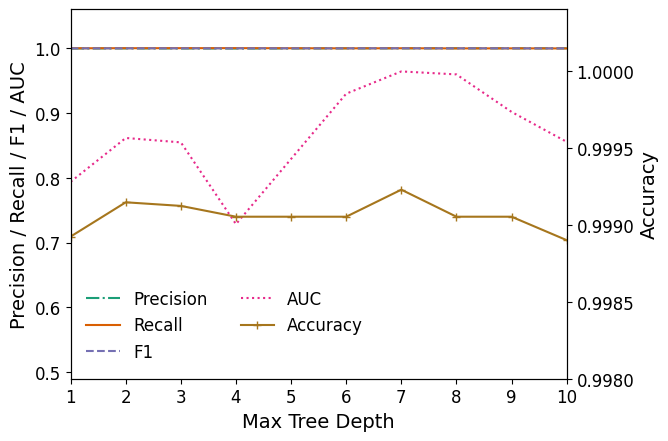

In [8]:
# gbdt
labels = ['Precision', 'Recall', 'F1', 'AUC']
linestyle = ['-.', '-', '--', ':', '+-']
cmap = plt.get_cmap('Dark2')
color = cmap(np.arange(7))

plt.figure(figsize=(10, 5))
fig, ax1 = plt.subplots()

ax1.set_ylabel('Precision / Recall / F1 / AUC', fontsize = 14)
ax1.set_xlabel('Max Tree Depth', fontsize = 14)
ax1.set_xticks(np.arange(1, 11, 1))
ax1.set_xlim(1, 10)
ax1.tick_params(labelsize=12)
for i in range(len(labels)):
    ax1.plot([i for i in range(1, 11)], gbdt[labels[i]], linestyle[i], label=labels[i], color=color[i])
ax1.set_ylim(0.49, 1.06)

ax2 = ax1.twinx()
ax2.plot([i for i in range(1, 11)], gbdt['Accuracy'], linestyle[-1], label='Accuracy', color=color[-1])
ax2.set_ylim(0.998, 1.0004)
ax2.set_ylabel('Accuracy', fontsize = 14)
ax2.tick_params(labelsize=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2,
           frameon = False,
           bbox_to_anchor=(0.62, 0.28, 0, 0),
           fontsize = 12,
           ncol = 2)
fig.savefig('./image/gbdt_no_pre.png',bbox_inches='tight', dpi=300)


<Figure size 1000x500 with 0 Axes>

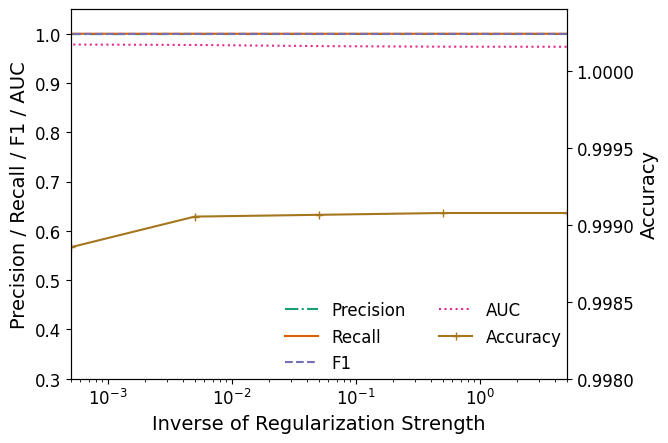

In [4]:
# lr
labels = ['Precision', 'Recall', 'F1', 'AUC']
linestyle = ['-.', '-', '--', ':', '+-']
cmap = plt.get_cmap('Dark2')
color = cmap(np.arange(7))

plt.figure(figsize=(10, 5))
fig, ax1 = plt.subplots()

ax1.set_ylabel('Precision / Recall / F1 / AUC', fontsize = 14)
ax1.set_xlabel('Inverse of Regularization Strength', fontsize = 14)
ax1.set_xticks(np.arange(1, 11, 1))
ax1.set_xlim(0.0005, 5)
ax1.set_xscale('log')
ax1.tick_params(labelsize=12)
for i in range(len(labels)):
    ax1.plot([5 * (0.1 ** j) for j in range(5)], lr[labels[i]], linestyle[i], label=labels[i], color=color[i])
ax1.set_ylim(0.3, 1.05)

ax2 = ax1.twinx()
ax2.plot([5 * (0.1 ** i) for i in range(0, 5)], lr['Accuracy'], linestyle[-1], label='Accuracy', color=color[-1])
ax2.set_ylim(0.998, 1.0004)
ax2.set_ylabel('Accuracy', fontsize = 14)
ax2.tick_params(labelsize=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2,
           frameon = False,
           bbox_to_anchor=(1.02, 0.25, 0, 0),
           fontsize = 12,
           ncol=2)
fig.savefig('./image/lr_no_pre.png', bbox_inches = 'tight', dpi= 300)


<Figure size 1000x500 with 0 Axes>

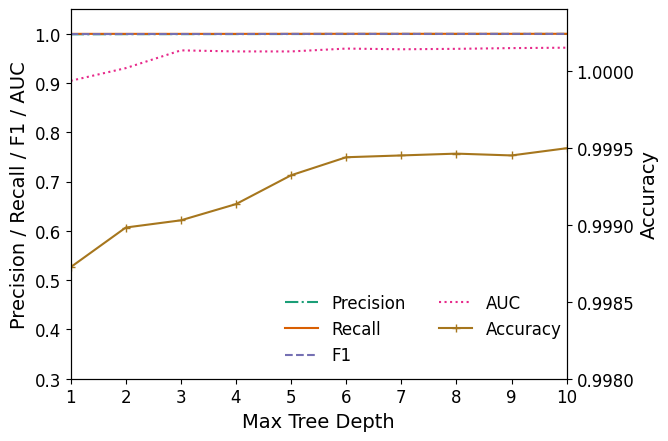

In [5]:
# random forest
labels = ['Precision', 'Recall', 'F1', 'AUC']
linestyle = ['-.', '-', '--', ':', '+-']
cmap = plt.get_cmap('Dark2')
color = cmap(np.arange(7))

plt.figure(figsize=(10, 5))
fig, ax1 = plt.subplots()

ax1.set_ylabel('Precision / Recall / F1 / AUC', fontsize = 14)
ax1.set_xlabel('Max Tree Depth', fontsize = 14)
ax1.set_xticks(np.arange(1, 11, 1))
ax1.set_xlim(1, 10)
ax1.tick_params(labelsize=12)
for i in range(len(labels)):
    ax1.plot([i for i in range(1, 11)], rf[labels[i]], linestyle[i], label=labels[i], color=color[i])
ax1.set_ylim(0.3, 1.05)

ax2 = ax1.twinx()
ax2.plot([i for i in range(1, 11)], rf['Accuracy'], linestyle[-1], label='Accuracy', color=color[-1])
ax2.set_ylim(0.998, 1.0004)
ax2.set_ylabel('Accuracy', fontsize = 14)
ax2.tick_params(labelsize=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2,
           frameon = False,
           bbox_to_anchor=(1.02, 0.27, 0, 0),
           fontsize = 12,
           ncol = 2)
fig.savefig('./image/rf_no_pre.png', bbox_inches='tight', dpi= 300)
